## AMCS 255: Advanced Computational Physics
### Exercise Sheet 1b: Image processing principles
#### Carlos Muñoz

Since we want to solve the heat equation $u_t=u_{xx}+u_{yy}$ we require a 2D grid with nx cells for x and ny cells for y. We will use a three-point centered discretization for both x and y, and forward Euler in time:
$$
\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t}=\frac{u_{i-1,j}^{n}-2u_{i,j}^{n}+u_{i+1,j}^{n}}{\Delta x}+\frac{u_{i,j-1}^{n}-2u_{i,j}^{n}+u_{i,j+1}^{n}}{\Delta y}
$$
Therefore, for the eigenvalues of the matrix given by the spatial discretization multiplied by $\Delta t$ to be inside of the stability region of forward Euler method, we require that the relation $\Delta t \leq \Delta x^2/4$ is satisfied.

In [104]:
import numpy as np
import matplotlib.pyplot as plt

In [109]:
#Setting endpoints for x and y
x_max=50
y_max=50

#Setting deltax, deltay, and deltat
dx=0.5
dy=0.5
dt=dx**2/10

c=dt/dx**2

#Setting final time and grid for solution of our problem
t_final=5
times=np.arange(0,t_final+dt,dt)
x_=np.arange(0,x_max+dx,dx)
y_=np.arange(0,y_max+dy,dy)
x,y=np.meshgrid(x_, y_)
nx=len(x)
ny=len(y)
#Setting trivial initial condition
initial_cond = lambda x,y: 0*x+0*y
u=initial_cond(x,y)

We can now define our method for update:
$$
u_{i,j}^{n+1}=\frac{\Delta t}{\Delta x} (u_{i+1,j}^{n}+u_{i-1,j}^{n}+u_{i,j+1}^{n}+u_{i,j-1}^{n}-4u_{i,j}^{n})+u_{i,j}^{n}.
$$
Note that we are considering periodic boundary conditions

In [114]:
def update_u(u,c):
    un=np.empty(np.shape(u))
    #updating inner points
    for i in range(1,len(x)-1):
        un[i][0]=c*(u[i+1][0]+u[i-1][0]+u[i][1]+u[i][ny-1]-4*u[i][0])+u[i][0]
        un[i][ny-1]=c*(u[i+1][ny-1]+u[i-1][ny-1]+u[i][0]+u[i][ny-2]-4*u[i][ny-1])+u[i][ny-1]      
        for j in range(1,len(y)-1):
            un[i][j]=c*(u[i+1][j]+u[i-1][j]+u[i][j+1]+u[i][j-1]-4*u[i][j])+u[i][j]
    
    for j in range(1,len(y)-1):
        un[0][j]=c*(u[1][j]+u[nx-1][j]+u[0][j+1]+u[0][j-1]-4*u[0][j])+u[0][j]
        un[nx-1][j]=c*(u[0][j]+u[nx-2][j]+u[nx-1][j+1]+u[nx-1][j-1]-4*u[nx-1][j])+u[nx-1][j]
    
    #updating boundary with periodic conditions
    un[0][0]=c*(u[1][0]+u[nx-1][0]+u[0][1]+u[0][ny-1]-4*u[0][0])+u[0][0]
    un[0][ny-1]=c*(u[1][ny-1]+u[nx-1][ny-1]+u[0][0]+u[0][ny-2]-4*u[0][ny-1])+u[0][0]
    un[nx-1][0]=c*(u[0][0]+u[nx-2][0]+u[nx-1][1]+u[nx-1][ny-1]-4*u[nx-1][0])+u[nx-1][0]
    un[nx-1][ny-1]=c*(u[0][ny-1]+u[nx-2][ny-1]+u[nx-1][0]+u[nx-1][ny-2]-4*u[nx-1][ny-1])+u[nx-1][ny-1]
    return un

We advance our trivial solution to check well-balancing of our method

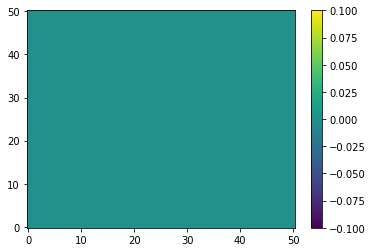

In [113]:
for time in times:
    u=update_u(u,c)
plt.pcolor(x,y,u)
plt.colorbar();

Let's try with a different initial condition

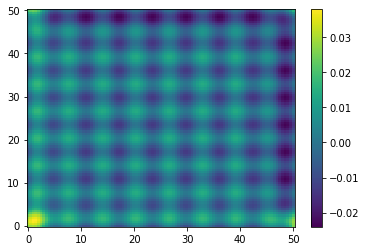

In [107]:
f = lambda x,y: np.sin(x)+np.sin(y)
u=f(x,y)
for time in times:
    u=update_u(u,c)

plt.pcolor(x,y,u)
plt.colorbar();

Let us now use an image as our initial condition. First, we import an image and get just one channel since we are considering a scalar valued function.

Image at time 0


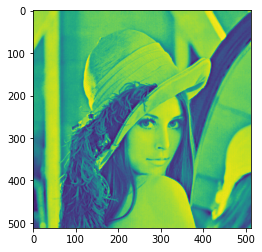

In [108]:
import matplotlib.image as image
img=image.imread('Lenna.png')
lum_img = img[:, :, 0]

print("Image at time 0")
imgplot = plt.imshow(lum_img)

We define a grid, taking care that our stability condition is still satisfied. Then, we set the image as our initial condition and run the simulation

In [102]:
x_=np.linspace(0,256,512)
y_=np.linspace(0,256,512)
x,y=np.meshgrid(x_, y_)
nx=len(x)
ny=len(y)
u=lum_img
for time in times:
    u=update_u(u,c)

Plotting the image after applying diffusion, we get the expected result

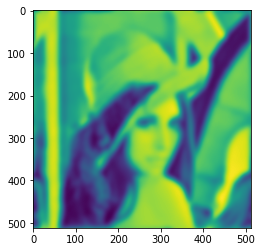

In [103]:
imgplot = plt.imshow(u)